In [1]:
# Load the dataset

import pandas as pd

df = pd.read_csv('FinalCleanedDataset.csv')

df.head()

,Brand,Model,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCapacity,FuelConsumptionPer100km,ColourExt,City,State,YearRanges
0,Ssangyong,Rexton,DEMO,Automatic,AWD,Diesel,5595.0,4,SUV,4,7,51990.0,2.2,8.700000,White,Caringbah,NSW,2020-2023
1,MG,MG3,USED,Automatic,Front,Premium,16.0,4,Hatchback,5,5,19990.0,1.5,6.700000,Black,Brookvale,NSW,2020-2023
2,BMW,430I,USED,Automatic,Rear,Premium,8472.0,4,Coupe,2,4,108988.0,2.0,6.600000,Grey,Sylvania,NSW,2020-2023
3,Renault,Arkana,USED,Automatic,Front,Unleaded,1035.0,4,SUV,4,5,34990.0,1.3,6.000000,Grey,Castle Hill,NSW,2020-2023
4,Toyota,Estima,USED,Automatic,Other,Unleaded,160230.0,4,Commercial,4,7,9990.0,2.4,7.805022,Grey,Saint Marys,NSW,Before 2012


In [2]:
# Information about the dataset

print('Number of rows and columns:', df.shape, '\n')

print('Column names:', df.columns, '\n')

print('Missing values:')
print(df.isnull().sum(), '\n')

print('Data types:')
print(df.dtypes, '\n')

# print(df.info(), '\n')

# print(df.describe(), '\n')

# Target variable possible values
print(df['YearRanges'].value_counts(), '\n')

Number of rows and columns: (15779, 18) 

Column names: Index(['Brand', 'Model', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'Kilometres', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats',
       'Price', 'EngineCapacity', 'FuelConsumptionPer100km', 'ColourExt',
       'City', 'State', 'YearRanges'],
      dtype='object') 

Missing values:
Brand                      0
Model                      0
UsedOrNew                  0
Transmission               0
DriveType                  0
FuelType                   0
Kilometres                 0
CylindersinEngine          0
BodyType                   0
Doors                      0
Seats                      0
Price                      0
EngineCapacity             0
FuelConsumptionPer100km    0
ColourExt                  0
City                       0
State                      0
YearRanges                 0
dtype: int64 

Data types:
Brand                       object
Model                       object
UsedOrNew            

In [3]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'YearRanges':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [4]:
# Encoding the target variable (YearRanges)

target_encoder = LabelEncoder()
df['YearRanges'] = target_encoder.fit_transform(df['YearRanges'])

# Target Variable Classes
print("Ordinal Classes:", target_encoder.classes_)

Ordinal Classes: ['2012-2016' '2017-2019' '2020-2023' 'Before 2012']


In [5]:
# Splitting data into train and test sets

from sklearn.model_selection import train_test_split

X = df.drop('YearRanges', axis=1)
y = df['YearRanges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes Accuracy: 0.6536755386565273

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60       930
           1       0.53      0.65      0.59       837
           2       0.82      0.80      0.81       905
           3       0.74      0.49      0.59       484

    accuracy                           0.65      3156
   macro avg       0.67      0.64      0.65      3156
weighted avg       0.67      0.65      0.65      3156

[[549 281  22  78]
 [150 548 134   5]
 [  3 174 728   0]
 [207  31   8 238]]


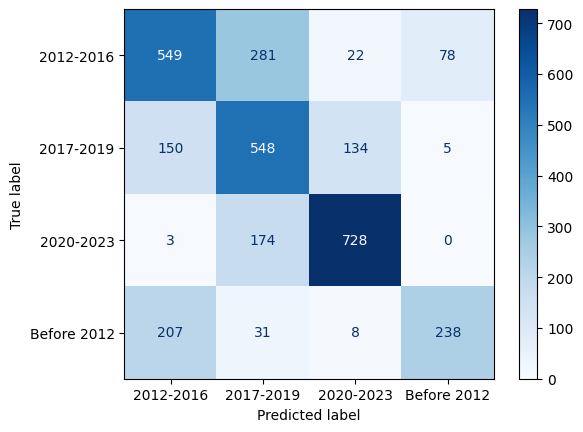

In [6]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Training the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluating the model
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')

Random Forest Accuracy: 0.7984790874524715

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       930
           1       0.71      0.74      0.73       837
           2       0.90      0.89      0.89       905
           3       0.84      0.81      0.82       484

    accuracy                           0.80      3156
   macro avg       0.80      0.80      0.80      3156
weighted avg       0.80      0.80      0.80      3156

[[706 143   5  76]
 [132 617  87   1]
 [  2  99 804   0]
 [ 84   6   1 393]]


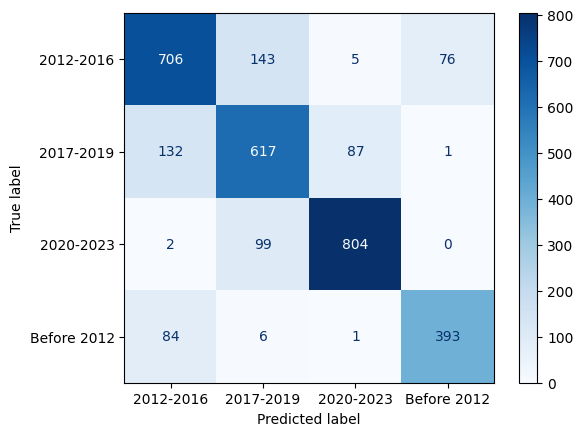

In [7]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Training the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluating the model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')

In [ ]:
########################################################

Logistic Regression Accuracy: 0.7167300380228137

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65       930
           1       0.62      0.66      0.64       837
           2       0.84      0.83      0.84       905
           3       0.70      0.81      0.75       484

    accuracy                           0.72      3156
   macro avg       0.71      0.73      0.72      3156
weighted avg       0.72      0.72      0.72      3156

[[565 185  20 160]
 [160 550 119   8]
 [  3 148 754   0]
 [ 77  11   3 393]]


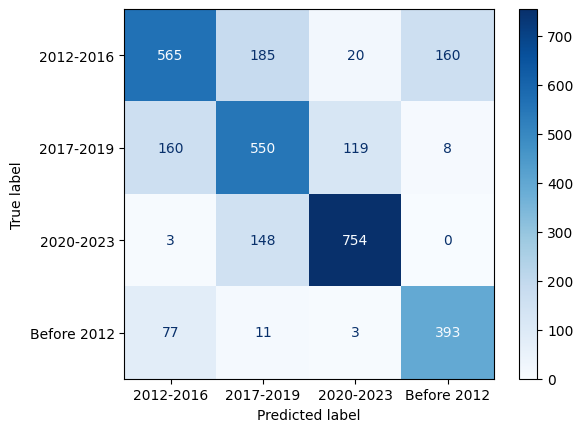

In [8]:
# Logistic Regression With Polynomial Features

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Logistic Regression with Best Parameters
log_reg_model = LogisticRegression(
    C=10,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

# Training the model
log_reg_model.fit(X_train_poly, y_train)

# Evaluating the model
y_pred_lr = log_reg_model.predict(X_test_poly)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')

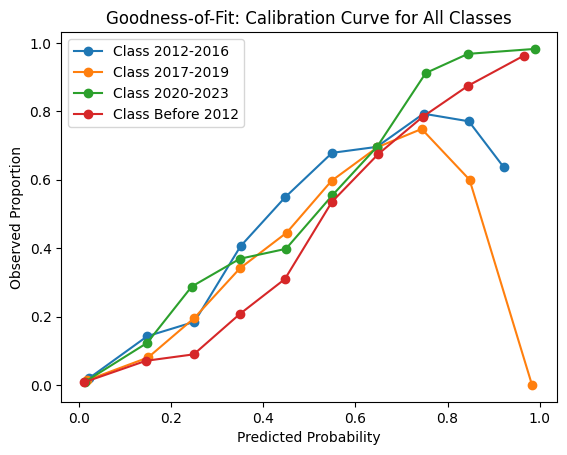

In [9]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

for i, class_label in enumerate(target_encoder.classes_):
    y_binary = (y_test == i).astype(int)  # Convert y_test to binary for the current class
    y_prob_binary = log_reg_model.predict_proba(X_test_poly)[:, i]

    obs, pred = calibration_curve(y_binary, y_prob_binary, n_bins=10, pos_label=1)
    plt.plot(pred, obs, marker="o", label=f"Class {class_label}")

plt.xlabel("Predicted Probability")
plt.ylabel("Observed Proportion")
plt.title("Goodness-of-Fit: Calibration Curve for All Classes")
plt.legend()
plt.show()

In [10]:
import numpy as np

# Coefficients
coefficients = log_reg_model.coef_[0]
intercept = log_reg_model.intercept_[0]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Odds ratios
odds_ratios = np.exp(coefficients)
print("Odds Ratios:", odds_ratios)


Intercept: -0.03170455485141419
Coefficients: [-1.03195026e-01 -7.03050908e-03  6.18282730e-01  2.86351038e-02
  1.67314440e-01 -6.10992011e-01  1.71308510e+00  3.67136621e-01
 -1.03144175e-02 -4.80778021e-02  9.48035238e-02 -1.57821926e+00
  4.20010964e-01 -2.65085520e-01 -5.26581142e-02  1.05883249e-02
 -8.47003418e-02 -7.73309821e-02  7.72965925e-02 -8.96293969e-02
 -2.23866058e-02  8.04333978e-02 -2.24186620e-01 -1.31559652e-01
 -5.53553082e-02 -8.63689695e-02 -2.35840279e-02  1.68351461e-02
 -1.68669232e-01 -1.01466857e-01  3.40019163e-01 -1.58937341e-02
  1.39261736e-02  3.18565489e-02  1.07329602e-02  1.52366657e-01
  8.43031636e-02  3.40098142e-02 -3.02739950e-02 -5.05364079e-02
  1.77024145e-01  2.48672389e-02 -4.56311109e-03 -6.71852236e-02
 -4.30356921e-02 -3.10871935e-01  2.24971635e-01 -2.70426308e-02
 -7.41241457e-02 -1.52661765e-02 -9.95941765e-01  1.54139296e-02
  1.32788853e-01 -1.48962961e-01 -2.30529287e-01  2.03968045e-01
 -9.54293330e-02 -8.99958897e-03 -5.59113055

In [11]:
print("Regression Equation: logit(P) =", intercept, "+", " + ".join([f"{coef}*X{i+1}" for i, coef in enumerate(coefficients)]))

Regression Equation: logit(P) = -0.03170455485141419 + -0.10319502582844857*X1 + -0.007030509080571592*X2 + 0.6182827297095121*X3 + 0.02863510384811716*X4 + 0.16731444002637663*X5 + -0.6109920110200139*X6 + 1.7130850978696124*X7 + 0.3671366212279762*X8 + -0.010314417505651182*X9 + -0.048077802061536314*X10 + 0.09480352382667413*X11 + -1.5782192582563885*X12 + 0.4200109635666142*X13 + -0.2650855195945338*X14 + -0.052658114244916926*X15 + 0.010588324884019312*X16 + -0.08470034178462356*X17 + -0.07733098207127745*X18 + 0.07729659252227307*X19 + -0.08962939692739022*X20 + -0.02238660580327832*X21 + 0.08043339780187844*X22 + -0.22418662006574464*X23 + -0.13155965219924176*X24 + -0.055355308170823535*X25 + -0.0863689695219073*X26 + -0.02358402790124395*X27 + 0.016835146127272712*X28 + -0.168669231647924*X29 + -0.10146685737705467*X30 + 0.3400191630867529*X31 + -0.015893734086393285*X32 + 0.013926173575770416*X33 + 0.031856548857772275*X34 + 0.010732960217890835*X35 + 0.1523666570401072*X36 +

In [12]:
import statsmodels.api as sm

# Fit the multinomial logistic regression model
mn_logit_model = sm.MNLogit(y_train, sm.add_constant(X_train_poly))

result = mn_logit_model.fit()

# Summary of the model
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:             YearRanges   No. Observations:                12623
Model:                        MNLogit   Df Residuals:                    12113
Method:                           MLE   Df Model:                          507
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                     nan
Time:                        11:06:00   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -17188.
Covariance Type:            nonrobust   LLR p-value:                       nan
YearRanges=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const               nan        nan        nan        nan         nan         nan
x1                  nan    

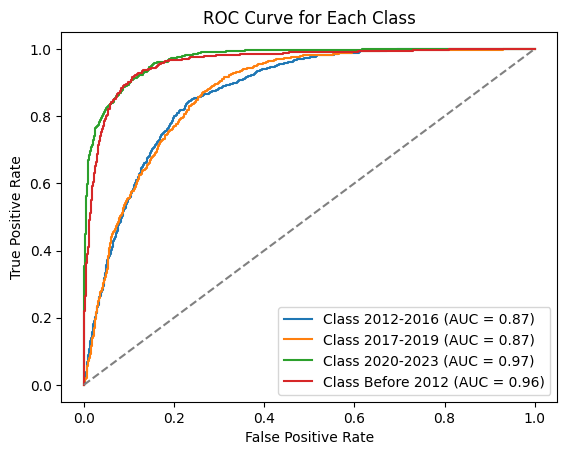

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for all classes
y_prob_lr = log_reg_model.predict_proba(X_test_poly)

# Loop through each class
for i, class_label in enumerate(target_encoder.classes_):
    # Binarize the target variable for the current class
    y_binary = (y_test == i).astype(int)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_binary, y_prob_lr[:, i])

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()


In [14]:
############################################################################

         Current function value: 0.733540
         Iterations: 35
Logistic Regression Accuracy: 0.6923320659062104

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63       930
           1       0.59      0.61      0.60       837
           2       0.83      0.84      0.83       905
           3       0.72      0.70      0.71       484

    accuracy                           0.69      3156
   macro avg       0.69      0.69      0.69      3156
weighted avg       0.69      0.69      0.69      3156

Confusion Matrix:
 [[576 207  19 128]
 [180 514 137   6]
 [  3 145 757   0]
 [130  12   4 338]]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


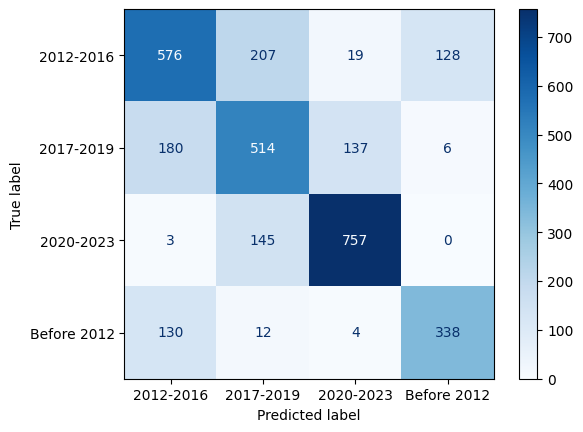

In [15]:
# Logistic Regression Without Polynomial Features

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import numpy as np

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the MNLogit model
mn_logit_model = sm.MNLogit(y_train, sm.add_constant(X_train_scaled))
result = mn_logit_model.fit()

# Evaluating the model

# Predict probabilities for the test set
y_prob = result.predict(sm.add_constant(X_test_scaled))
# Convert probabilities to class predictions
y_pred = np.argmax(y_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot(cmap='Blues')

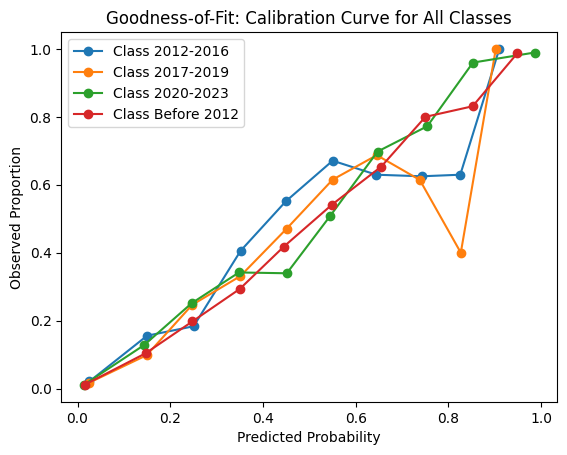

In [16]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

for i, class_label in enumerate(target_encoder.classes_):
    y_binary = (y_test == i).astype(int)  # Convert y_test to binary for the current class
    y_prob_binary = y_prob[:, i]  # Probabilities for the current class

    # Compute observed vs predicted probabilities
    obs, pred = calibration_curve(y_binary, y_prob_binary, n_bins=10, pos_label=1)

    # Plot calibration curve
    plt.plot(pred, obs, marker="o", label=f"Class {class_label}")

plt.xlabel("Predicted Probability")
plt.ylabel("Observed Proportion")
plt.title("Goodness-of-Fit: Calibration Curve for All Classes")
plt.legend()
plt.show()


In [17]:
import numpy as np

# Extract coefficients and intercepts for all classes
coefficients = result.params
print("Coefficients for Each Class:\n", coefficients)

# Compute odds ratios for each coefficient
odds_ratios = np.exp(coefficients)
print("Odds Ratios for Each Class:\n", odds_ratios)

Coefficients for Each Class:
               0         1         2
const -0.329833  0.236857 -0.391692
x1     0.050294  0.180535  0.359894
x2     0.046062  0.119772 -0.134909
x3     2.283886 -7.555216 -8.002521
x4    -0.271819 -0.425265  0.121058
x5    -0.216190 -0.361315  0.100238
x6     0.131810  0.164441  0.060311
x7    -1.204079 -4.821640  0.376337
x8    -0.624940 -1.165580  0.165680
x9     0.133563  0.155085 -0.175614
x10    0.034628  0.173562 -0.026002
x11   -0.112990 -0.096997  0.144798
x12    1.662555  2.219428 -3.070237
x13    0.120194  0.206198 -0.148856
x14   -0.082431  0.039904  1.071104
x15    0.191328  0.273310 -0.195478
x16   -0.011118  0.062929  0.012944
x17    0.088542  0.231120  0.073790
Odds Ratios for Each Class:
               0         1         2
const  0.719044  1.267260  0.675912
x1     1.051581  1.197859  1.433177
x2     1.047139  1.127239  0.873796
x3     9.814750  0.000523  0.000335
x4     0.761992  0.653597  1.128690
x5     0.805582  0.696759  1.105434
x6   

In [18]:
# Display regression equations for each class
for class_index, class_label in enumerate(coefficients.columns):
    intercept = coefficients.iloc[0, class_index]  # Intercept for the current class
    class_coefficients = coefficients.iloc[1:, class_index]  # Coefficients for the current class

    # Display equation for the current class
    equation = (
        f"logit(P(Class={class_label})) = {intercept:.4f} + "
        + " + ".join([f"{coef:.4f}*X{i+1}" for i, coef in enumerate(class_coefficients)])
    )
    print(f"Regression Equation for Class {class_label}:\n{equation}\n")

Regression Equation for Class 0:
logit(P(Class=0)) = -0.3298 + 0.0503*X1 + 0.0461*X2 + 2.2839*X3 + -0.2718*X4 + -0.2162*X5 + 0.1318*X6 + -1.2041*X7 + -0.6249*X8 + 0.1336*X9 + 0.0346*X10 + -0.1130*X11 + 1.6626*X12 + 0.1202*X13 + -0.0824*X14 + 0.1913*X15 + -0.0111*X16 + 0.0885*X17

Regression Equation for Class 1:
logit(P(Class=1)) = 0.2369 + 0.1805*X1 + 0.1198*X2 + -7.5552*X3 + -0.4253*X4 + -0.3613*X5 + 0.1644*X6 + -4.8216*X7 + -1.1656*X8 + 0.1551*X9 + 0.1736*X10 + -0.0970*X11 + 2.2194*X12 + 0.2062*X13 + 0.0399*X14 + 0.2733*X15 + 0.0629*X16 + 0.2311*X17

Regression Equation for Class 2:
logit(P(Class=2)) = -0.3917 + 0.3599*X1 + -0.1349*X2 + -8.0025*X3 + 0.1211*X4 + 0.1002*X5 + 0.0603*X6 + 0.3763*X7 + 0.1657*X8 + -0.1756*X9 + -0.0260*X10 + 0.1448*X11 + -3.0702*X12 + -0.1489*X13 + 1.0711*X14 + -0.1955*X15 + 0.0129*X16 + 0.0738*X17



In [19]:
# Print summary of the model
print(result.summary())

                          MNLogit Regression Results                          
Dep. Variable:             YearRanges   No. Observations:                12623
Model:                        MNLogit   Df Residuals:                    12569
Method:                           MLE   Df Model:                           51
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.4613
Time:                        11:06:07   Log-Likelihood:                -9259.5
converged:                      False   LL-Null:                       -17188.
Covariance Type:            nonrobust   LLR p-value:                     0.000
YearRanges=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3298   1548.783     -0.000      1.000   -3035.888    3035.229
x1               0.0503      0.030      1.685      0.092      -0.008       0.109
x2               0.0461      0.030      1.56

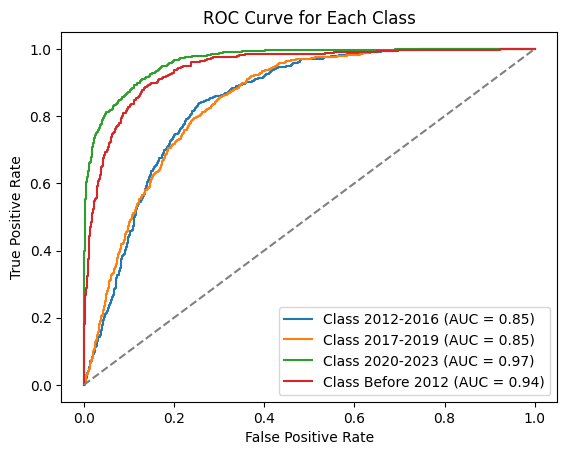

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use predicted probabilities from the MNLogit model
y_prob_lr = y_prob

for i, class_label in enumerate(target_encoder.classes_):
    # Binarize the target variable for the current class
    y_binary = (y_test == i).astype(int)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_binary, y_prob_lr[:, i])

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()

In [ ]:
########################################

Optimization terminated successfully.
         Current function value: 0.771329
         Iterations 9
Simplified Model Accuracy: 0.6758555133079848

Simplified Model Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       930
           1       0.58      0.60      0.59       837
           2       0.81      0.84      0.82       905
           3       0.69      0.64      0.66       484

    accuracy                           0.68      3156
   macro avg       0.68      0.67      0.67      3156
weighted avg       0.67      0.68      0.67      3156

Simplified Model Confusion Matrix:
 [[564 207  23 136]
 [179 499 158   1]
 [  3 140 762   0]
 [159  14   3 308]]


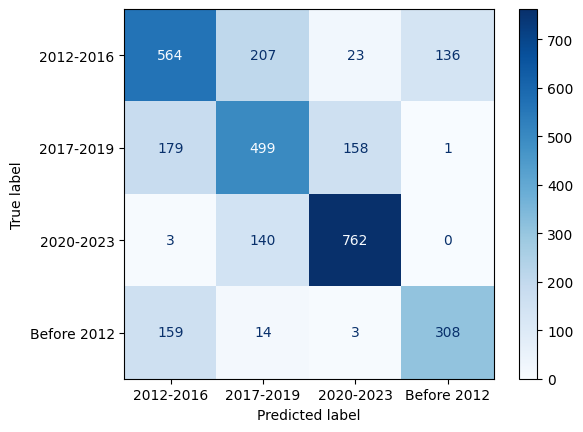

In [24]:
# Simplified Logistic Regression Without Polynomial Terms

# Define the significant features to retain after removing insignificant features
significant_features_manual = [
    'x4', 'x5', 'x7', 'x8', 'x9', 'x12', 'x15', 'x17'
]

original_feature_names = [f'x{i+1}' for i in range(X_train_scaled.shape[1])]

significant_indices_manual = [original_feature_names.index(feature) for feature in significant_features_manual]

# Create simplified datasets
X_train_simplified = X_train_scaled[:, significant_indices_manual]
X_test_simplified = X_test_scaled[:, significant_indices_manual]

# Refit the MNLogit model with significant features
simplified_model = sm.MNLogit(y_train, sm.add_constant(X_train_simplified))
simplified_result = simplified_model.fit()

# Predict probabilities for the test set
y_prob_simplified = simplified_result.predict(sm.add_constant(X_test_simplified))

# Convert probabilities to class predictions
y_pred_simplified = np.argmax(y_prob_simplified, axis=1)

# Evaluate the simplified model
accuracy_simplified = accuracy_score(y_test, y_pred_simplified)
print("Simplified Model Accuracy:", accuracy_simplified)
print("\nSimplified Model Classification Report:\n", classification_report(y_test, y_pred_simplified))

# Confusion matrix
cm_simplified = confusion_matrix(y_test, y_pred_simplified)
print("Simplified Model Confusion Matrix:\n", cm_simplified)
disp_simplified = ConfusionMatrixDisplay(confusion_matrix=cm_simplified, display_labels=target_encoder.classes_)
disp_simplified.plot(cmap='Blues')

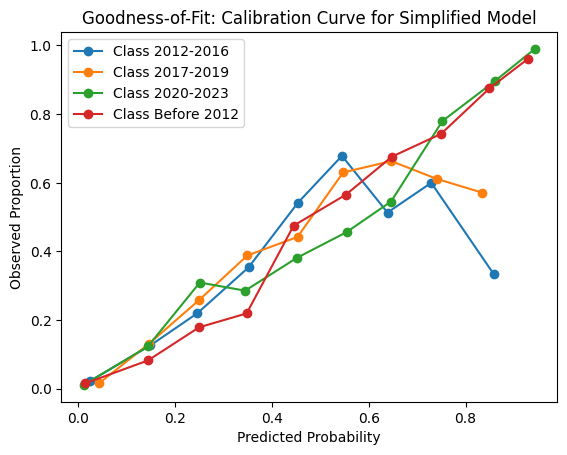

In [25]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Use probabilities from the MNLogit simplified model
for i, class_label in enumerate(target_encoder.classes_):
    y_binary = (y_test == i).astype(int)  # Convert y_test to binary for the current class
    y_prob_binary = y_prob_simplified[:, i]  # Probabilities for the current class

    # Compute observed vs predicted probabilities
    obs, pred = calibration_curve(y_binary, y_prob_binary, n_bins=10, pos_label=1)

    # Plot calibration curve
    plt.plot(pred, obs, marker="o", label=f"Class {class_label}")

plt.xlabel("Predicted Probability")
plt.ylabel("Observed Proportion")
plt.title("Goodness-of-Fit: Calibration Curve for Simplified Model")
plt.legend()
plt.show()


In [26]:
import numpy as np

# Extract coefficients and intercepts for all classes
coefficients_simplified = simplified_result.params
print("Coefficients for Each Class (Simplified Model):\n", coefficients_simplified)

# Compute odds ratios for each coefficient
odds_ratios_simplified = np.exp(coefficients_simplified)
print("Odds Ratios for Each Class (Simplified Model):\n", odds_ratios_simplified)


Coefficients for Each Class (Simplified Model):
               0         1         2
const  0.385011 -2.420201 -2.682046
x1    -0.266649 -0.425718  0.105058
x2    -0.193837 -0.385464  0.049540
x3    -1.242517 -5.402494  0.582670
x4    -0.585405 -1.080664  0.595988
x5     0.093616  0.152255 -0.052204
x6     1.594403  2.193156 -2.854113
x7     0.189919  0.270815 -0.144335
x8     0.092180  0.216132  0.059797
Odds Ratios for Each Class (Simplified Model):
               0         1         2
const  1.469631  0.088904  0.068423
x1     0.765942  0.653301  1.110775
x2     0.823792  0.680135  1.050788
x3     0.288657  0.004505  1.790813
x4     0.556880  0.339370  1.814823
x5     1.098138  1.164457  0.949135
x6     4.925386  8.963462  0.057607
x7     1.209151  1.311032  0.865598
x8     1.096562  1.241266  1.061621


In [27]:
# Display regression equations for each class
for class_index, class_label in enumerate(simplified_result.params.columns):  # Iterate over classes
    intercept = simplified_result.params.iloc[0, class_index]  # Intercept for the current class
    class_coefficients = simplified_result.params.iloc[1:, class_index]  # Coefficients for the current class

    equation = (
        f"logit(P(Class={class_label})) = {intercept:.4f} + "
        + " + ".join([f"{coef:.4f}*X{i+1}" for i, coef in enumerate(class_coefficients)])
    )
    print(f"Regression Equation for Class {class_label}:\n{equation}\n")

Regression Equation for Class 0:
logit(P(Class=0)) = 0.3850 + -0.2666*X1 + -0.1938*X2 + -1.2425*X3 + -0.5854*X4 + 0.0936*X5 + 1.5944*X6 + 0.1899*X7 + 0.0922*X8

Regression Equation for Class 1:
logit(P(Class=1)) = -2.4202 + -0.4257*X1 + -0.3855*X2 + -5.4025*X3 + -1.0807*X4 + 0.1523*X5 + 2.1932*X6 + 0.2708*X7 + 0.2161*X8

Regression Equation for Class 2:
logit(P(Class=2)) = -2.6820 + 0.1051*X1 + 0.0495*X2 + 0.5827*X3 + 0.5960*X4 + -0.0522*X5 + -2.8541*X6 + -0.1443*X7 + 0.0598*X8



In [29]:
# Print summary of the model
print(simplified_result.summary())

                          MNLogit Regression Results                          
Dep. Variable:             YearRanges   No. Observations:                12623
Model:                        MNLogit   Df Residuals:                    12596
Method:                           MLE   Df Model:                           24
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.4335
Time:                        11:18:31   Log-Likelihood:                -9736.5
converged:                       True   LL-Null:                       -17188.
Covariance Type:            nonrobust   LLR p-value:                     0.000
YearRanges=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3850      0.032     12.010      0.000       0.322       0.448
x1              -0.2666      0.032     -8.448      0.000      -0.329      -0.205
x2              -0.1938      0.031     -6.25

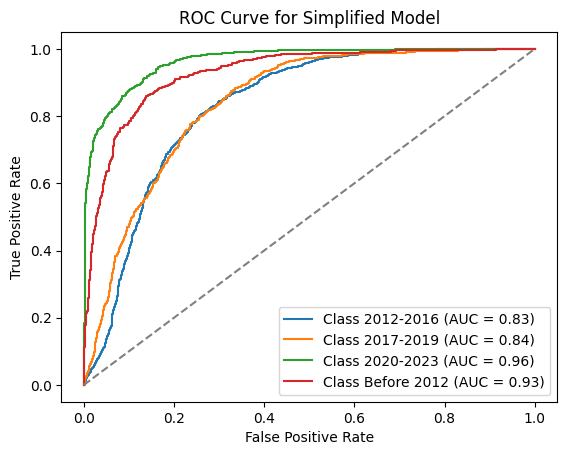

In [22]:
# ROC Curve and AUC for Simplified Model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for i, class_label in enumerate(target_encoder.classes_):
    y_binary = (y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_binary, y_prob_simplified[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Simplified Model")
plt.legend()
plt.show()